In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
model_data = pd.read_csv('batting_first_data.csv')
X = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [3]:
model_data.corr().style.background_gradient(cmap = 'coolwarm', axis = None)

,curr_rate,balls_left,wickets_in_hand,rem_rate
curr_rate,1.000000,-0.193013,0.095709,0.239343
balls_left,-0.193013,1.000000,0.768020,-0.250170
wickets_in_hand,0.095709,0.768020,1.000000,0.011923
rem_rate,0.239343,-0.250170,0.011923,1.000000


In [4]:
reg = LinearRegression()
pipe = make_pipeline(StandardScaler(), reg)
pipe.fit(X_train, y_train)
y_pred_lr = pipe.predict(X_test)

In [5]:
def adj_r2_score(r2_score, n, k):
    return 1 - (1 - r2_score) * (n - 1) / (n - k - 1)

r2_score = metrics.r2_score(y_test, y_pred_lr)
n, k = X_test.shape

print('R² = %.4f' % r2_score)
print('adj. R² = %.4f' % adj_r2_score(r2_score, n, k))

R² = 0.1743
adj. R² = 0.1742


In [6]:
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('MAE = %.4f' % metrics.mean_absolute_error(y_test, y_pred_lr))

RMSE = 2.9126
MAE = 2.0598


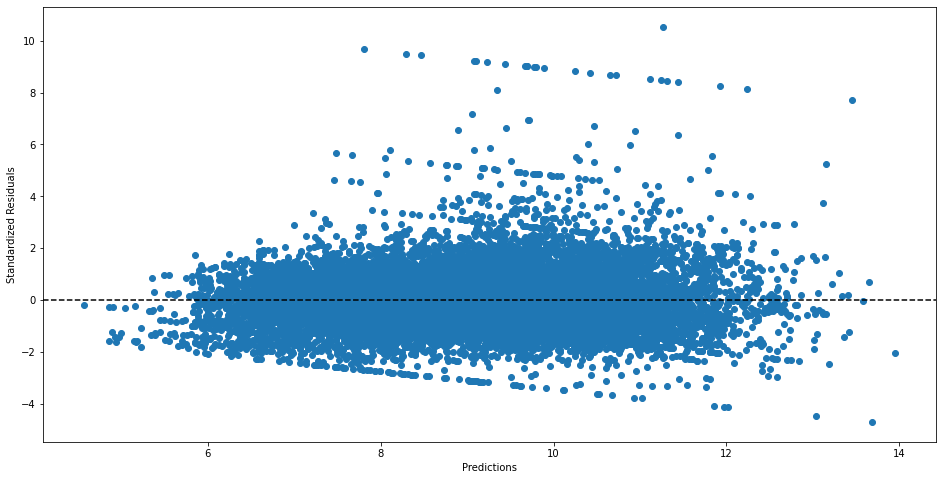

In [7]:
residuals = y_test - y_pred_lr
std_residuals = (residuals - residuals.mean()) / residuals.std()

plt.figure(figsize = (16, 8))
plt.axhline(0, color = 'black', ls = '--')
plt.scatter(y_pred_lr, std_residuals)

plt.xlabel('Predictions')
plt.ylabel('Standardized Residuals')

plt.show()

In [8]:
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
color_map = {
    'Afghanistan': '#2b1cff',
    'Australia': '#ffeb12',
    'India': '#4287f5',
    'Sri Lanka': '#0a008f',
    'West Indies': '#9c1a2a'
}

In [10]:
batting_team = 'Sri Lanka'
bowling_team = 'India'

In [11]:
def plot_score_pred():
    plt.figure(figsize = (16, 8))
    plt.rcParams.update({
        'font.size': 16,
        'lines.linewidth': 3
    })
    plot_x = (120 - X_new.balls_left) / 6
    plot_y = (X_new.curr_rate * plot_x) + ((X_new.rem_rate * X_new.balls_left) /  6)

    plt.title('Score Prediction')
    plt.xlabel('Overs', labelpad = 16)
    plt.ylabel('Projected Scores of Batting Team', labelpad = 16)

    plt.plot(plot_x, plot_y, color = color_map[batting_team])
    plt.axhline(X_new.curr_rate.iloc[-1] * 20, color = 'black', ls = '--')
    plt.legend(['Predicted', 'Actual'], loc = 'lower right')
    
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

    plt.show()

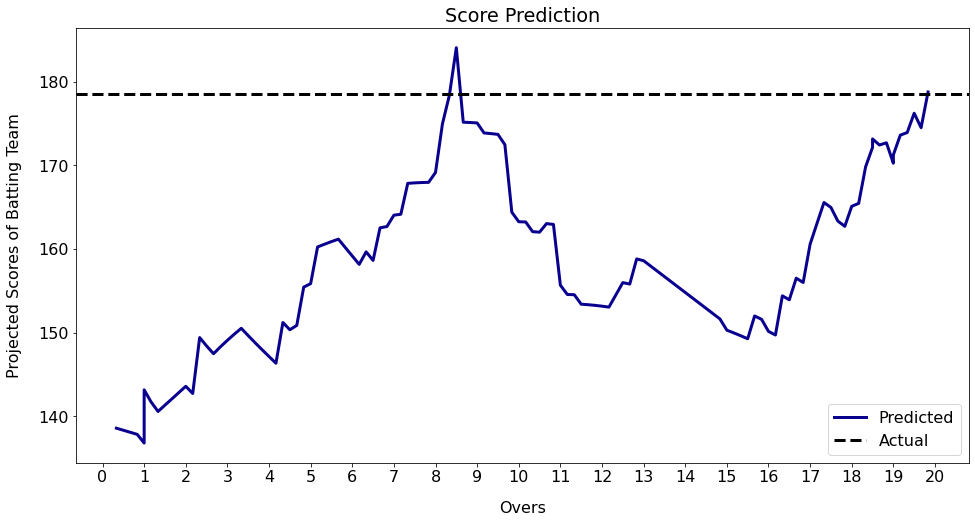

In [12]:
X_new = pd.read_csv('ind_vs_sl_2nd_t20i_batting_first_data.csv')
X_new['rem_rate'] = pipe.predict(X_new)

plot_score_pred()